题目描述：假设你是一位经济学家，正在研究家庭年收入（因变量 $Y$）与家庭主要收入者的教育年数（解释变量 $X$）之间的关系。你决定使用简单线性回归模型来分析这两个变量之间的关系。你收集了 10 个家庭的数据，如下所示：
[10, 12, 8, 15, 16, 18, 20, 14, 15, 11, 15, 19, 20]
[40, 45, 32, 50, 55, 65, 75, 48, 50, 38, 52, 70, 80]

# 1. 导入需要的库

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 2. 示例数据：教育年数(X)与家庭年收入(Y)的关系
——**也就相当于题目给的数据集，然后题目要求我们找到他们之间的关系**

In [10]:
X = np.array([10, 12, 8, 15, 16, 18, 20, 14, 15, 11, 15, 19, 20]).reshape(-1, 1)  # 教育年数
Y = np.array([40, 45, 32, 50, 55, 65, 75, 48, 50, 38, 52, 70, 80])  # 家庭年收入，单位：千美元

# 3. 绘制散点图看看数据长什么样先

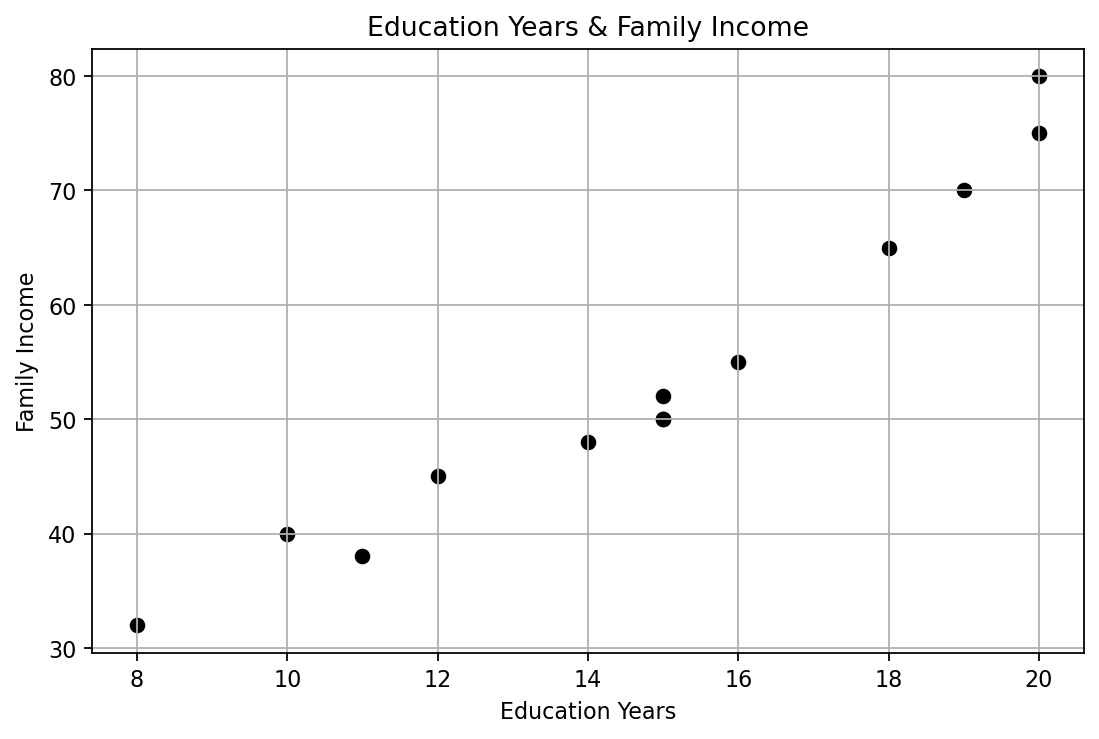

In [11]:
# 绘制散点图
# 设置图的大小为长10，宽6
plt.figure(figsize=(8, 5), dpi=160)
plt.scatter(X, Y, color='black')
# 添加标题和坐标轴标签，中文显示会有问题，为了方便就用英文
plt.title('Education Years & Family Income')
plt.xlabel('Education Years')
plt.ylabel('Family Income')
plt.grid(True)
plt.show()

3. 不使用scikit-learn库，手动实现简单线性回归，想一想如果想要用一条直线拟合这些点，我们需要计算些什么？
- 大家应该都很了解直线，需要一个斜率，需要一个截距
- 根据最小二乘法，我们需要计算斜率和截距
    - 斜率的计算公式为：$\beta_1 = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n}(X_i - \bar{X})^2}$
    - 截距的计算公式为：$\beta_0 = \bar{Y} - \beta_1\bar{X}$
- 其中，$\bar{X}$和$\bar{Y}$分别为X和Y的均值
- 有了斜率和截距，我们就可以得到回归方程：$\hat{Y} = \beta_0 + \beta_1X$
- 有了回归方程，我们就可以预测Y值了

In [12]:
def simple_linear_regression(X, Y):
    # 计算X和Y的均值
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    # 计算斜率(beta_1)和截距(beta_0)
    numerator = np.sum((X - mean_X) * (Y - mean_Y))
    denominator = np.sum((X - mean_X) ** 2)
    beta_1 = numerator / denominator # 斜率
    beta_0 = mean_Y - beta_1 * mean_X # 截距
    
    return beta_0, beta_1

# 4. 使用模型参数预测Y值

In [13]:
# 计算截距和斜率
beta_0, beta_1 = simple_linear_regression(X.flatten(), Y)

# 使用模型参数预测Y值
Y_pred_manual = beta_0 + beta_1 * X

# 5. 绘制回归线

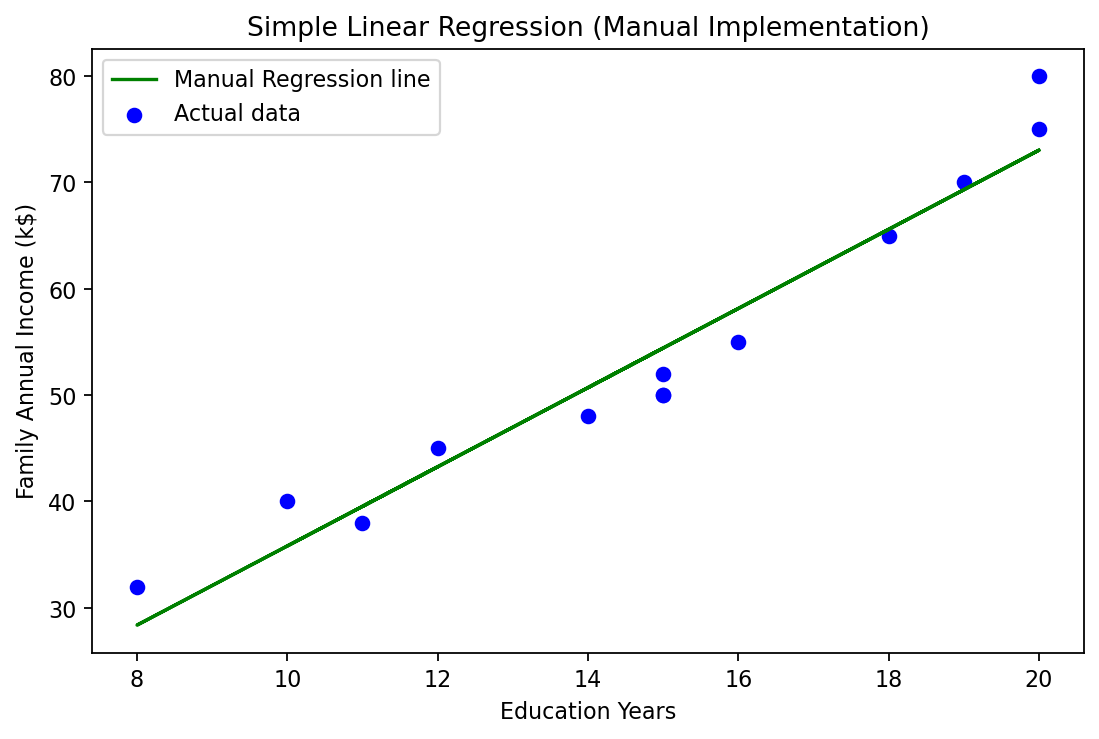

In [14]:
# 绘制数据点和手动实现的回归线
plt.figure(figsize=(8, 5), dpi=160)
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred_manual, color='green', label='Manual Regression line')
plt.xlabel('Education Years')
plt.ylabel('Family Annual Income (k$)')
plt.title('Simple Linear Regression (Manual Implementation)')
plt.legend()
plt.show()

In [15]:
print('手动实现的回归方程为：Y = {:.2f} + {:.2f}X'.format(beta_0, beta_1))

手动实现的回归方程为：Y = -1.39 + 3.72X


# 6. 评估模型

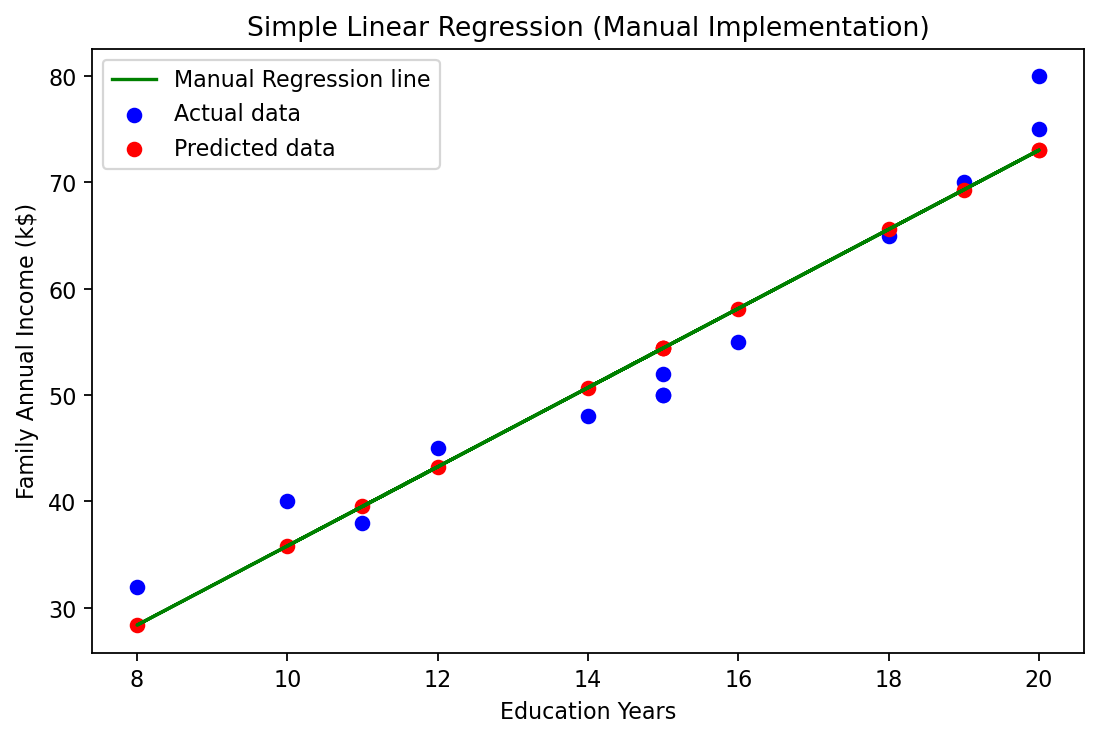

In [19]:
#可视化预测值的点
plt.figure(figsize=(8, 5), dpi=160)
plt.scatter(X, Y, color='blue', label='Actual data')
plt.scatter(X, Y_pred_manual, color='red', label='Predicted data')
plt.plot(X, Y_pred_manual, color='green', label='Manual Regression line')
plt.xlabel('Education Years')
plt.ylabel('Family Annual Income (k$)')
plt.title('Simple Linear Regression (Manual Implementation)')
plt.legend()
plt.show()

In [24]:
# 计算R^2，也就是决定系数
# R^2 = SSR/SST
# SSR：回归平方和，SST：总平方和
# R^2的取值范围是0~1，越接近1，表明模型拟合的越好
SSR = np.sum((Y - np.mean(Y)) ** 2)  # 回归平方和
SST = np.sum((Y - Y_pred_manual) ** 2)  # 总平方和
R_squared = 1 - (SSR / SST)
R_squared

0.9603765946024477

可以发现，手动实现的回归方程为：$Y = -7.65 + 5.41X$，决定系数$R^2 = 0.96$，表明模型拟合的还不错。